In [37]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plot created

#Read the data

df = pd.read_csv(r"C:\Users\USER\Documents\movies.csv")

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [39]:
df['votes'] = df['votes'].astype('Int64')
df['runtime'] = df['runtime'].astype('Int64')

In [40]:
#formatting dataframe-released column to exclude the country

df['released'] = df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False)

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


In [41]:
df['released'] = pd.to_datetime(df['released'], format="%B %d, %Y")

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


In [42]:
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98,1980


In [43]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162,29
7445,535,5,0,2019,2019-04-26,8.4,903000,162,743,2241,55,356000000.0,2.797501e+09,1606,181,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194,17
6663,5144,5,0,2015,2015-12-18,7.8,876000,1125,2550,524,55,245000000.0,2.069522e+09,1540,138,35
7244,536,5,0,2018,2018-04-27,8.4,897000,162,743,2241,55,321000000.0,2.048360e+09,1606,149,38


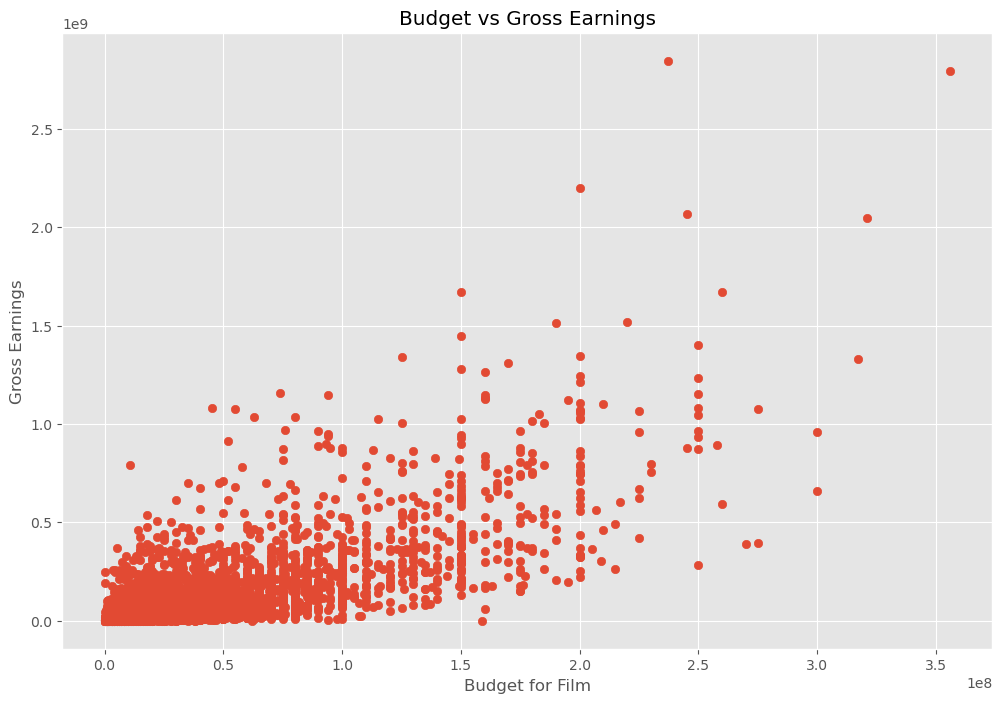

In [14]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

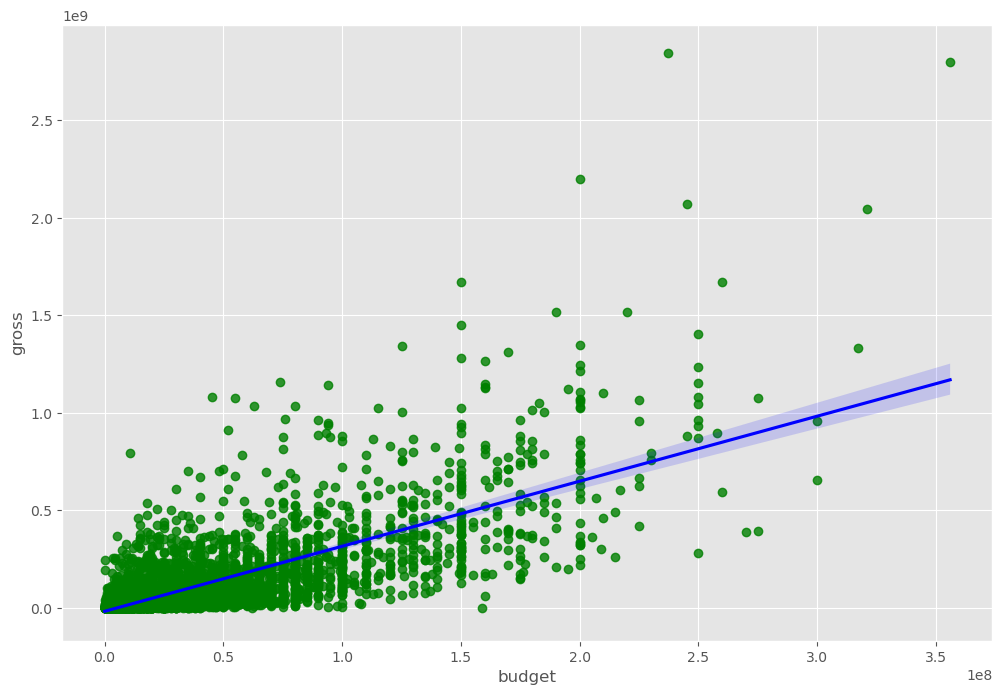

In [15]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})

In [16]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_21752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_21752\3010219160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


Text(120.72222222222221, 0.5, 'Movie Features')

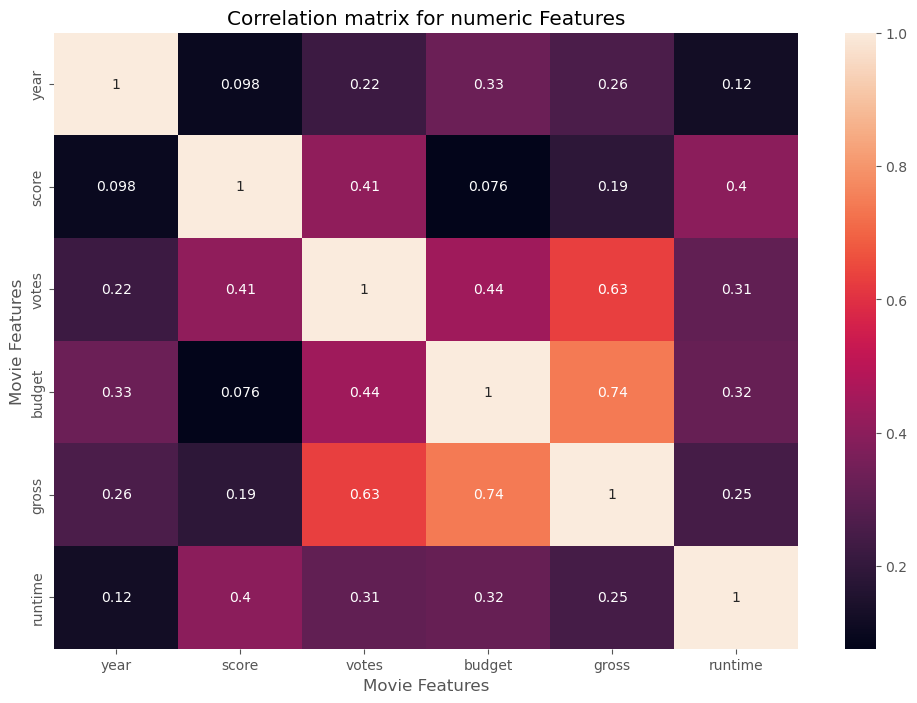

In [20]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [28]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [29]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162,29
7445,535,5,0,2019,2019-04-26,8.4,903000,162,743,2241,55,356000000.0,2.797501e+09,1606,181,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194,17
6663,5144,5,0,2015,2015-12-18,7.8,876000,1125,2550,524,55,245000000.0,2.069522e+09,1540,138,35
7244,536,5,0,2018,2018-04-27,8.4,897000,162,743,2241,55,321000000.0,2.048360e+09,1606,149,38


In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162,29
7445,535,5,0,2019,2019-04-26,8.4,903000,162,743,2241,55,356000000.0,2.797501e+09,1606,181,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194,17
6663,5144,5,0,2015,2015-12-18,7.8,876000,1125,2550,524,55,245000000.0,2.069522e+09,1540,138,35
7244,536,5,0,2018,2018-04-27,8.4,897000,162,743,2241,55,321000000.0,2.048360e+09,1606,149,38


In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149,2018


C:\Users\USER\AppData\Local\Temp\ipykernel_21752\4111034738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerized.corr(method='pearson')


Text(120.72222222222221, 0.5, 'Movie Features')

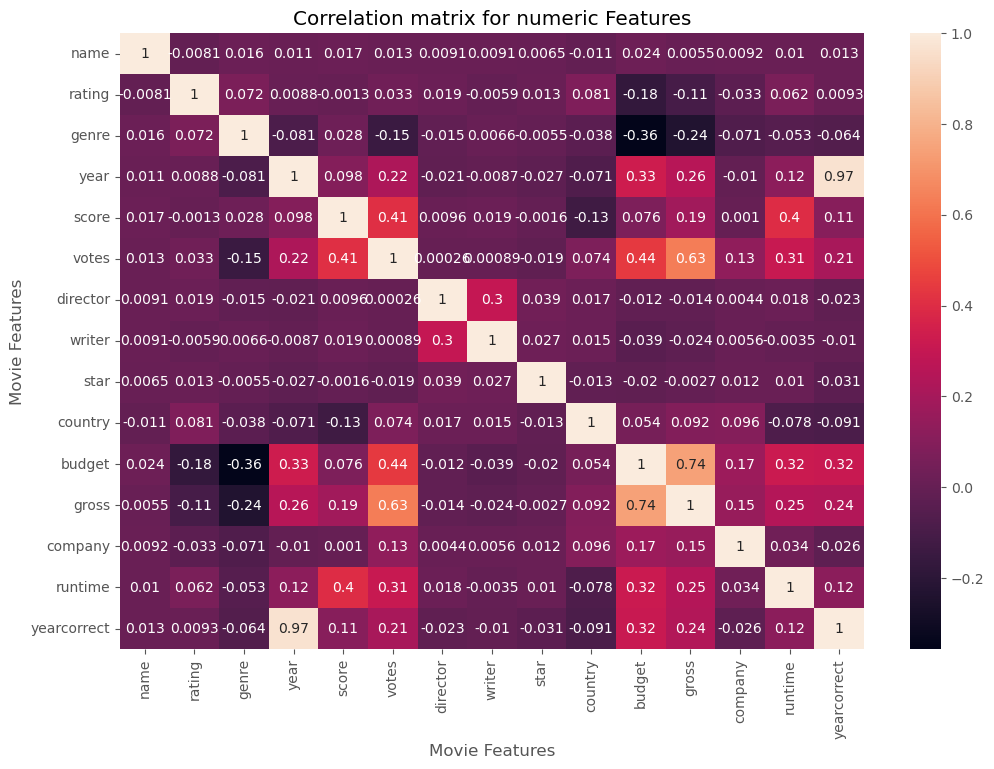

In [45]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [46]:
df_numerized.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_21752\1284351489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.012835
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.009280
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.063573
year,0.011453,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.967486
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.107219
votes,0.013088,0.033225,-0.145307,0.222945,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.206475
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.022579
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.010063
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.031166
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.090962


In [49]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

C:\Users\USER\AppData\Local\Temp\ipykernel_21752\1290311030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_numerized.corr()


name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect    0.012835
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.176002
             gross         -0.107339
 

In [48]:
pd.set_option('display.max_rows', None)

In [50]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.356564
budget       genre         -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
gross        rating        -0.107339
rating       gross         -0.107339
yearcorrect  country       -0.090962
country      yearcorrect   -0.090962
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
genre        company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
genre        yearcorrect   -0.063573
yearcorrect  genre         -0.063573
runtime      genre         -0.052711
genre        runtime       -0.052711
budget       writer        -0.039451
w

In [51]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
yearcorrect  year           0.967486
year         yearcorrect    0.967486
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings